## Template Waveforms

In [1]:
# feel free to change according to your needs
data_prefix = "/adata/electro/bt0975/bt0975-23092021-0105/" # session
cluster = 11 # which cluster to analyze

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# load templates
templates = np.load(data_prefix + "templates.npy")
n_clusters, n_timepoints, n_channels = templates.shape
print("Clusters:",n_clusters, "timepoints:",n_timepoints,", Channels:",n_channels)


Clusters: 84 timepoints: 82 , Channels: 64


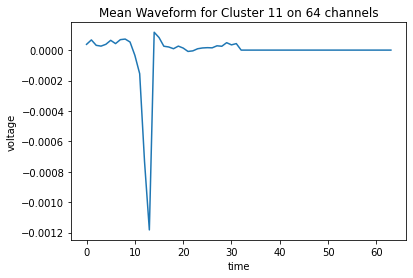

In [3]:
# select a cluster you want to work on
#cluster = 11

# get the data for that specific cluster (turns 3 dimensions to 2 dimensions by projecting on that component)
template_cluster = templates[cluster]

# plot mean waveform of all channels
mean_waveform = np.mean(template_cluster, axis=0)

plt.plot(mean_waveform)
plt.title("Mean Waveform for Cluster "+str(cluster)+" on "+str(n_channels)+" channels")
plt.xlabel("time")
plt.ylabel("voltage")
plt.show()


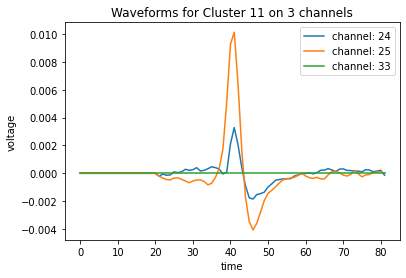

In [4]:
# select some channels
channels = [24,25,33]

for channel in channels:
	plt.plot( template_cluster[:,channel] , label="channel: "+str(channel) )

plt.title("Waveforms for Cluster "+str(cluster)+" on "+str(len(channels))+" channels")
plt.xlabel("time")
plt.ylabel("voltage")
plt.legend()
plt.show()


In [5]:
# ----------------------------------------------------

# get map that puts each spike to its associated template

st = np.load(data_prefix+"spike_templates.npy")

print("There are",len(st),"spikes in total and",len(np.unique(st)),"assignments to templates.")

diffclusters = list(set(range(n_clusters)) - set(np.unique(st)))
print("Clusters not used (",len(diffclusters),"):",diffclusters)

# get index of spikes that were assigned that cluster
spikes_in_cluster = np.where(st==cluster)[0]
print("In that cluster (",cluster,") there are",len(spikes_in_cluster),"spikes.")

# get the corresponding amplitudes
amplitudes = np.load(data_prefix+"amplitudes.npy")
amplitudes_of_spikes_in_cluster = amplitudes[spikes_in_cluster]
mean_amplitude = np.mean(amplitudes_of_spikes_in_cluster)
print("The mean amplitude is",mean_amplitude)


There are 1591609 spikes in total and 83 assignments to templates.
Clusters not used ( 1 ): [50]
In that cluster ( 11 ) there are 43906 spikes.
The mean amplitude is 20.864848235622983


In [6]:
# get peak to peak amplitude for each channel
amps = np.ptp(template_cluster,axis=0)
channel_amps = np.array([range(n_channels),amps]).T
channel_amps = np.flip(sorted(channel_amps, key=lambda x: x[1]))
channels_with_highest_amp = channel_amps[:5,1]
channels = channels_with_highest_amp.astype(int)

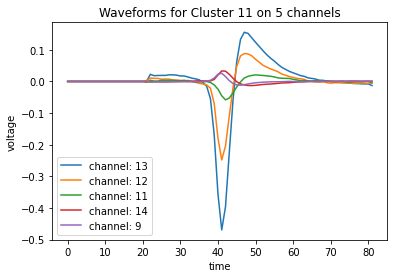

In [7]:
# plot all channels
#channels = range(n_channels)

for channel in channels:
	plt.plot( template_cluster[:,channel] , label="channel: "+str(channel) )

plt.title("Waveforms for Cluster "+str(cluster)+" on "+str(len(channels))+" channels")
plt.xlabel("time")
plt.ylabel("voltage")
plt.legend()
plt.show()


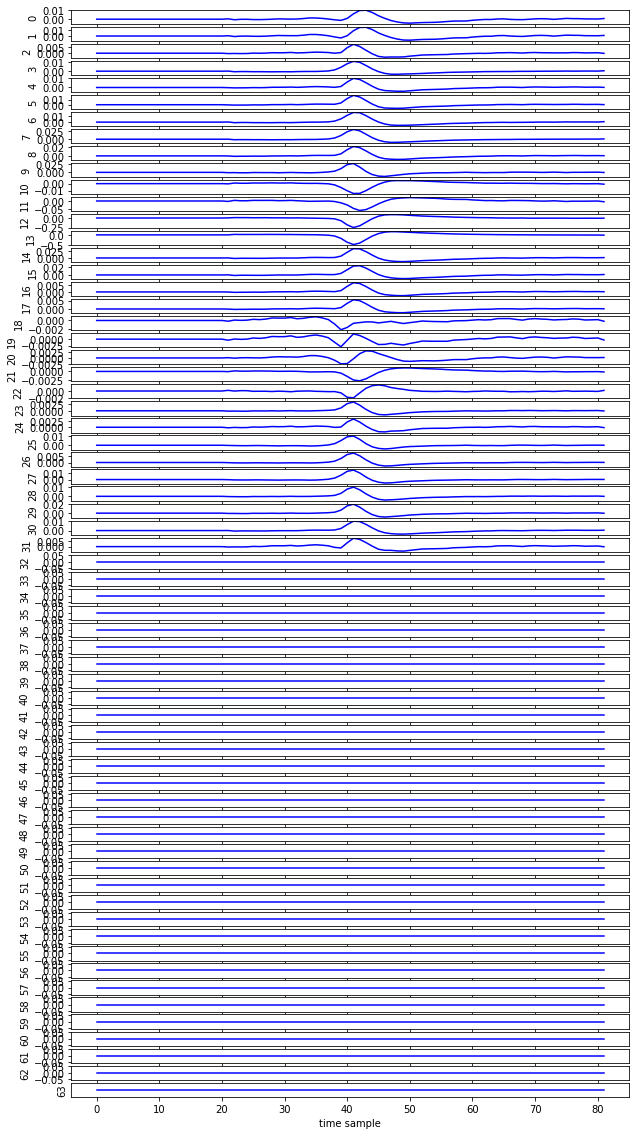

In [8]:
# plot all channels
channels = range(n_channels)

fig, ax = plt.subplots(nrows=n_channels, sharex=True, figsize=(10,20))

for i,channel in enumerate(channels):
    ax[i].plot( template_cluster[:,channel] , label="channel: "+str(channel) , color="blue")
    ax[i].set_ylabel(i)
plt.xlabel("time sample")
plt.yticks([])
plt.show()


